## Company of choice and URLS of their sites

   <h3>Microsoft Corporation</h3>
   
   <ul>
       <li>Website - https://www.microsoft.com/</li>
       <li>Twitter - https://twitter.com/Microsoft</li>
       <li>Facebook - https://www.facebook.com/Microsoft/</li>
       <li>Instagram - https://www.instagram.com/microsoft/?hl=en</li>
       <li>LinkedIn - https://www.linkedin.com/company/microsoft/</li>
       <li>Youtube - https://www.youtube.com/MICROSOFT</li>
   </ul>

### Import the necessary librabries

In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import snscrape.modules.twitter as sntwitter
from wordcloud import WordCloud, STOPWORDS
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('porter_test')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\piuso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\piuso\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package porter_test to
[nltk_data]     C:\Users\piuso\AppData\Roaming\nltk_data...
[nltk_data]   Package porter_test is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\piuso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Data scrapping with snscrape library from twitter

In [17]:
n_tweets = 20000

scraper = sntwitter.TwitterSearchScraper('from:Microsoft')

tweets = []

for i, tweet in tqdm(enumerate(scraper.get_items()), total=n_tweets): 
    
    data = [
        tweet.rawContent
    ]
    
    tweets.append(data)
    
    if i > n_tweets:
        break

  0%|          | 0/20000 [00:00<?, ?it/s]

### Load your social media data

In [20]:
# Display the sample data in our data frame
tweet_df = pd.DataFrame(tweets,columns=["tweets"])

tweet_df.to_csv("microsoft.csv", index=False)

tweet_df.head(10)

,tweets
0,@Windows We found one: 🍀
1,@Microsoft365 👏
2,@VisheshBansal17 Word. 😎
3,@undrcvrw ❤️
4,Struggling to create a @PowerPoint deck? Start...
5,*opens presentation* \n \nWould you like to p...
6,Introducing the next era of productivity with ...
7,Your inbox: 179\n \nYour inbox with Copilot fo...
8,The end of writer's block. Beautiful presentat...
9,Copilot for @MicrosoftTeams takes the work out...


### Clean the text data
<ul>
    <li>Remove URLS</li>
</ul>

In [21]:
#Remove the urls
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('', text)

tweet_df['tweets'] = tweet_df['tweets'].apply(remove_urls)

print(tweet_df['tweets'].sample(10))

9450     “What we’ve learned through this pandemic is t...
16098    @AliceDonsworth Have you had a chance to try #...
17070    Santa is in London! Have you spotted him? You ...
15075    @jeffreytz Glad you think so. Do you have a fa...
15391    @theatre_love_ Nice! What do you like to do on...
17980    Weekend Reading: The Nokia Lumia 1020 @Windows...
4693                                  @kirkjangel Noted. 😅
18261    Trivia Tuesday Answer: @PCMag called the Micro...
7821                                  These are ours: 🎮🙌 💾
5258                                         @streamlabs 😂
Name: tweets, dtype: object


<ul>
    <li>Remove Special Characters</li>
</ul>

In [24]:
#Remove special characters
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]' # keep only alphanumeric and whitespace characters
    text = re.sub(pattern, '', text)
    return text

tweet_df['tweets'] = tweet_df['tweets'].apply(remove_special_characters)

print(tweet_df['tweets'].sample(10))

14411    CristianoGr8 Great to hear youre enjoying the ...
9101                                             Antonahj 
17485         Youll Flip when you see this new Sony VAIO  
2752                                     shanselman  Scott
14763    mkasanm Thanks for sharing Learn more about th...
15920    devjeremiascb Definitely Have you checked out ...
7316                               Snow90K A strong opener
2252                  mbacookie Cant argue with this logic
883                     Brawaru Cant argue with this logic
16569    AhmetZappa Glad you liked the ad Check out mor...
Name: tweets, dtype: object


<ul>
    <li>Convert text to lower case</li>
</ul>

In [25]:
tweet_df['tweets'] = tweet_df['tweets'].str.lower()

print(tweet_df['tweets'].sample(10))

15225    cooper326 happy to hear what do you like to do...
6450      xbox wipes tear this ones going up on the fridge
11731    were meeting customer needs with the cloud  \n...
2379                                microsoftlearn  we are
878                    nerdpyle so close  yet still so far
4663                   lagymclagnpants thats how its done 
19104    fun fact backspace is the 3rd most used key on...
16144           quinncohane looks great thanks for sharing
17325    become a citizen of ryse amp claim the privile...
6087                           brandonleblanc final answer
Name: tweets, dtype: object


<ul>
    <li>Tokenize the text data</li>
</ul>


In [26]:
# Tokenize the text data
# Resulting tokens are stored in a new column called tokens
tweet_df['tokens'] = tweet_df['tweets'].apply(nltk.word_tokenize)

tweet_df.head(10)

,tweets,tokens
0,windows we found one,"[windows, we, found, one]"
1,microsoft365,[microsoft365]
2,visheshbansal17 word,"[visheshbansal17, word]"
3,undrcvrw,[undrcvrw]
4,struggling to create a powerpoint deck start a...,"[struggling, to, create, a, powerpoint, deck, ..."
5,opens presentation \n \nwould you like to pic...,"[opens, presentation, would, you, like, to, pi..."
6,introducing the next era of productivity with ai,"[introducing, the, next, era, of, productivity..."
7,your inbox 179\n \nyour inbox with copilot for...,"[your, inbox, 179, your, inbox, with, copilot,..."
8,the end of writers block beautiful presentatio...,"[the, end, of, writers, block, beautiful, pres..."
9,copilot for microsoftteams takes the work out ...,"[copilot, for, microsoftteams, takes, the, wor..."


<ul>
    <li>Remove stopwords</li>
</ul>

In [27]:
# Remove stopwords
from nltk.corpus import stopwords

def remove_stopwords(tokens):
    stopwords_list = stopwords.words('english')
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords_list]
    return filtered_tokens

tweet_df['tokens'] = tweet_df['tokens'].apply(remove_stopwords)

print(tweet_df['tokens'].sample(10))

1277       [siromar1, movie, year, highest, rating, sheet]
13013                           [jimbrunner, seattletimes]
11584    [mobile, app, irel8, running, azure, helping, ...
10262      [morningbrew, cant, ignore, solitaire, classic]
7443                                 [mattyboy182, smoosh]
3768                            [mattdemotts, beg, differ]
3223                          [nftsocialking, yes, always]
4030                            [elledeemme, works, works]
1497                                    [dwizzlers, sorry]
7243     [dr, jeffrey, lieberman, professor, amp, chair...
Name: tokens, dtype: object


### Stem and display a sample of the stemmed data

In [28]:
# Stem the data
from nltk.stem import PorterStemmer

def stem_tokens(tokens):
    porter = PorterStemmer()
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return stemmed_tokens

tweet_df['stemmed_tokens'] = tweet_df['tokens'].apply(stem_tokens)

print(tweet_df['stemmed_tokens'].sample(10))

tweet_df.head(10)

10350    [avail, preorder, us, today, surfac, duo, brin...
13515    [technolog, make, teacher, live, simpler, spar...
5309                                           [streamlab]
7474                [rorypreddi, plant, count, say, count]
8760                                [bdsam, wowwwww, brad]
10811                                     [today, msbuild]
2831     [playmak, trailblaz, commit, empow, women, acr...
14474    [100daystillla, proud, sponsor, specialolymp, ...
5879                                            [mcdonald]
142                                 [microsoftteam, cours]
Name: stemmed_tokens, dtype: object


,tweets,tokens,stemmed_tokens
0,windows we found one,"[windows, found, one]","[window, found, one]"
1,microsoft365,[microsoft365],[microsoft365]
2,visheshbansal17 word,"[visheshbansal17, word]","[visheshbansal17, word]"
3,undrcvrw,[undrcvrw],[undrcvrw]
4,struggling to create a powerpoint deck start a...,"[struggling, create, powerpoint, deck, start, ...","[struggl, creat, powerpoint, deck, start, new,..."
5,opens presentation \n \nwould you like to pic...,"[opens, presentation, would, like, pick, left,...","[open, present, would, like, pick, left, 12, day]"
6,introducing the next era of productivity with ai,"[introducing, next, era, productivity, ai]","[introduc, next, era, product, ai]"
7,your inbox 179\n \nyour inbox with copilot for...,"[inbox, 179, inbox, copilot, outlook, 0]","[inbox, 179, inbox, copilot, outlook, 0]"
8,the end of writers block beautiful presentatio...,"[end, writers, block, beautiful, presentations...","[end, writer, block, beauti, present, singl, c..."
9,copilot for microsoftteams takes the work out ...,"[copilot, microsoftteams, takes, work, working...","[copilot, microsoftteam, take, work, work, tog..."


### Lemmatize and display a sample of the lemmatized data 

In [29]:
# Lemmatize the data
from nltk.stem import WordNetLemmatizer

def lemmatize_tokens(stemmed_tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]
    return lemmatized_tokens

tweet_df['lemmatized_tokens'] = tweet_df['stemmed_tokens'].apply(lemmatize_tokens)

print(tweet_df['lemmatized_tokens'].sample(10))

tweet_df.head(10)

6450                    [xbox, wipe, tear, one, go, fridg]
6748     [ye, real, microsoft, paint, art, credit, eart...
12257    [ceo, satyanadella, predict, inclus, design, t...
3398                          [guiguiyt, youv, got, point]
4108                            [xboxgamepass, well, best]
194      [app, innov, report, share, insight, top, chal...
7424                                       [rossoch, mlem]
901           [username4leo, quick, pretend, your, asleep]
9067                                      [brianivi, evid]
11941    [commun, power, build, futur, want, live, cant...
Name: lemmatized_tokens, dtype: object


,tweets,tokens,stemmed_tokens,lemmatized_tokens
0,windows we found one,"[windows, found, one]","[window, found, one]","[window, found, one]"
1,microsoft365,[microsoft365],[microsoft365],[microsoft365]
2,visheshbansal17 word,"[visheshbansal17, word]","[visheshbansal17, word]","[visheshbansal17, word]"
3,undrcvrw,[undrcvrw],[undrcvrw],[undrcvrw]
4,struggling to create a powerpoint deck start a...,"[struggling, create, powerpoint, deck, start, ...","[struggl, creat, powerpoint, deck, start, new,...","[struggl, creat, powerpoint, deck, start, new,..."
5,opens presentation \n \nwould you like to pic...,"[opens, presentation, would, like, pick, left,...","[open, present, would, like, pick, left, 12, day]","[open, present, would, like, pick, left, 12, day]"
6,introducing the next era of productivity with ai,"[introducing, next, era, productivity, ai]","[introduc, next, era, product, ai]","[introduc, next, era, product, ai]"
7,your inbox 179\n \nyour inbox with copilot for...,"[inbox, 179, inbox, copilot, outlook, 0]","[inbox, 179, inbox, copilot, outlook, 0]","[inbox, 179, inbox, copilot, outlook, 0]"
8,the end of writers block beautiful presentatio...,"[end, writers, block, beautiful, presentations...","[end, writer, block, beauti, present, singl, c...","[end, writer, block, beauti, present, singl, c..."
9,copilot for microsoftteams takes the work out ...,"[copilot, microsoftteams, takes, work, working...","[copilot, microsoftteam, take, work, work, tog...","[copilot, microsoftteam, take, work, work, tog..."


### Use word cloud to visualize the data from the above step

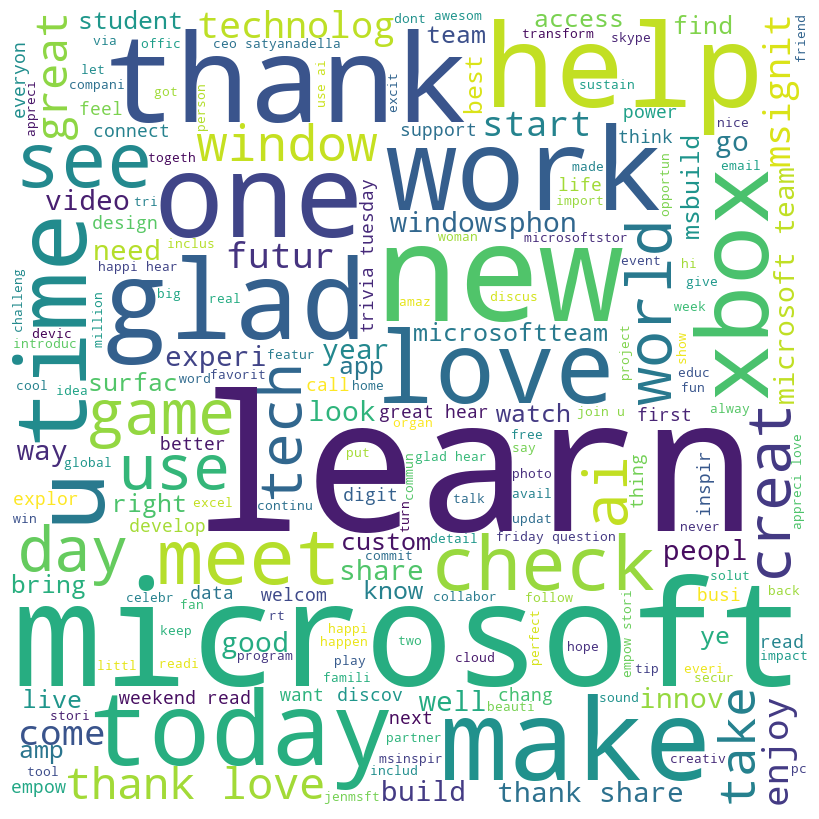

In [30]:
# Combine all lemmatized tokens into a single list
all_tokens = []
for row in tweet_df['lemmatized_tokens']:
    all_tokens += row

# Join the tokens into a single string separated by spaces
text = ' '.join(all_tokens)

# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Save the cleaned data to a new CSV file

In [31]:
tweet_df.to_csv('cleaned_data.csv', index=False)